# Introduction to Supply and Demand

In [1]:
import os
import platform

# Paths for macOS and Windows
paths = {
    "Darwin": "Dropbox/大三下/PythonCourse/Econometrics/A First Course in Quantitative Economics with Python",
    "Windows": "C:\\Users\\iamja\\Dropbox\\大三下\\PythonCourse\\Econometrics\\A First Course in Quantitative Economics with Python"
}

# Get current OS, set new path based on OS, or default if not macOS/Windows
new_path = paths.get(platform.system(), os.getcwd())

# Result without try-except block for simplicity
result_simplified = f"Intended working directory: {new_path}"
result_simplified

'Intended working directory: Dropbox/大三下/PythonCourse/Econometrics/A First Course in Quantitative Economics with Python'

## Consumer

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

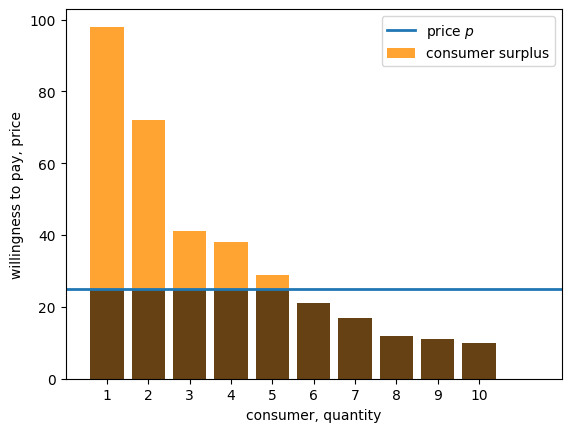

In [5]:
fig, ax = plt.subplots()
consumers = range(1, 11) # consumers 1,..., 10
# willingness to pay for each consumer
wtp = (98, 72, 41, 38, 29, 21, 17, 12, 11, 10)
price = 25
ax.bar(consumers, wtp, label="consumer surplus", color="darkorange", alpha=0.8)
ax.plot((0, 12), (price, price), lw=2, label="price $p$")
ax.bar(consumers, [min(w, price) for w in wtp], color="black", alpha=0.6)
ax.set_xlim(0, 12)
ax.set_xticks(consumers)
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("consumer, quantity")
ax.legend()
plt.show()

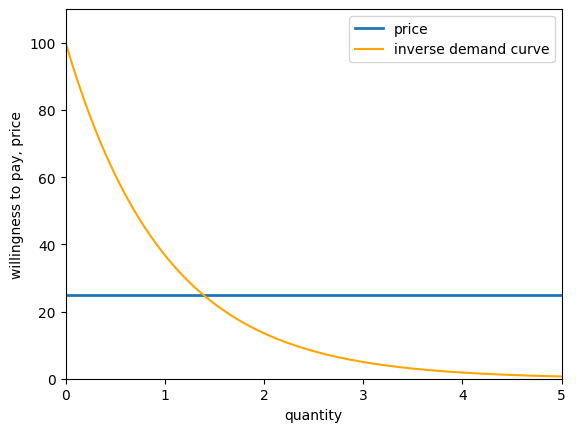

In [8]:
def inverse_demand(q):
    return 100 * np.exp(- q)

# build a grid to evaluate the function at different values of q
q_min, q_max = 0, 5
q_grid = np.linspace(q_min, q_max, 1000)

# plot the inverse demand curve
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="inverse demand curve")
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.legend()
plt.show()

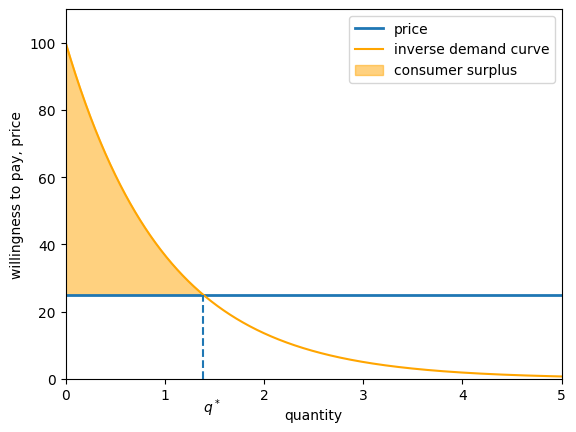

In [9]:
# solve for the value of q where demand meets price
q_star = np.log(100) - np.log(price)

fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="inverse demand curve")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, np.full(len(small_grid), price),
                inverse_demand(small_grid), color="orange",
                alpha=0.5, label="consumer surplus")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

## Producer

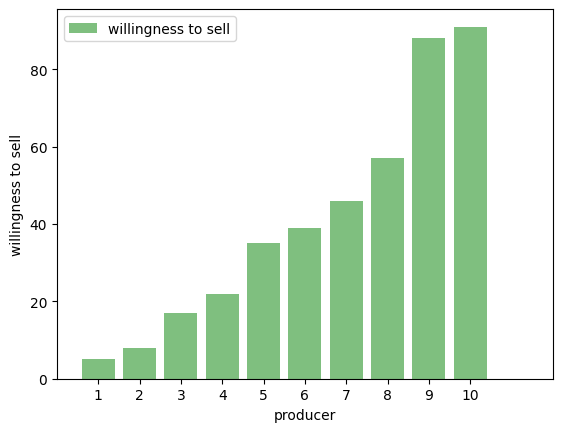

In [10]:
fig, ax = plt.subplots()
producers = range(1, 11) # producers 1,..., 10
# willingness to sell for each producer
wts = (5, 8, 17, 22, 35, 39, 46, 57, 88, 91)
price = 25
ax.bar(producers, wts, label="willingness to sell", color="green", alpha=0.5)
ax.set_xlim(0, 12)
ax.set_xticks(producers)
ax.set_ylabel("willingness to sell")
ax.set_xlabel("producer")
ax.legend()
plt.show()

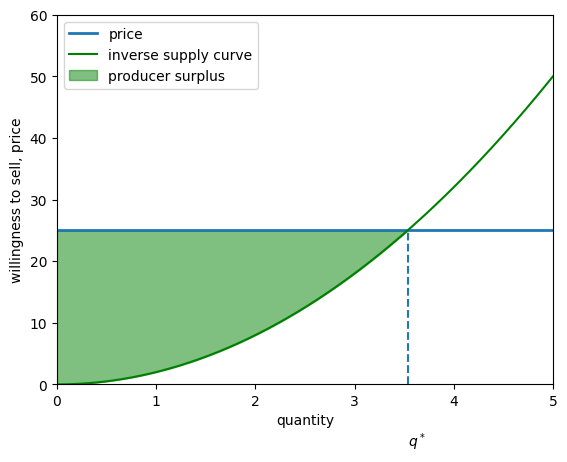

In [11]:
def inverse_supply(q):
    return 2 * q**2

# solve for the value of q where supply meets price
q_star = (price / 2)**(1/2)

# plot the inverse supply curve
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_supply(q_grid), 
        color="green", label="inverse supply curve")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, inverse_supply(small_grid), 
                np.full(len(small_grid), price), 
                color="green",
                alpha=0.5, label="producer surplus")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("willingness to sell, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 60)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

### Ex.6
$$p=i_d(q)=d_0-d_1q^{0.6}$$
$$p=i_s(q)=s_o+s_1q^{1.8}$$

In the equilibrium, the price will be 0.43464100588737675, the quantity will be 0.9056389490133799.
Consumer Surplus: 0.19200417196628156
Producer Surplus: 0.19482681142111902


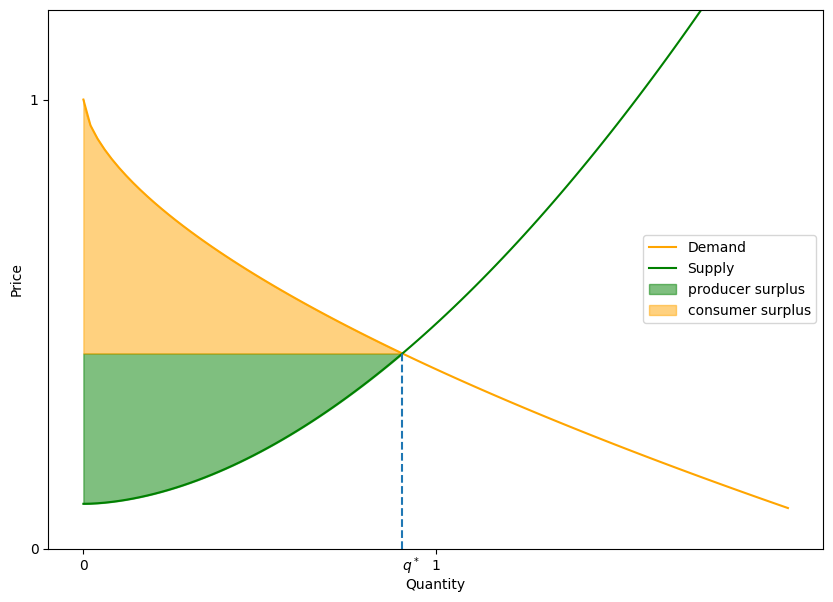

In [52]:
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad

Market = namedtuple('Market', ['d_0', # demand intercept
                               'd_1', # demand slope
                               's_0', # supply intercept
                               's_1'] # supply slope
                   )

def create_market(d_0=1.0, d_1=0.6, s_0=0.1, s_1=0.4):
    return Market(d_0=d_0, d_1=d_1, s_0=s_0, s_1=s_1)

def inverse_demand(q,model):
    demand = model.d_0 - model.d_1 * (q ** 0.6)
    return demand

def inverse_supply(q,model):
    supply = model.s_0 + model.s_1 * (q ** 1.8)
    return supply

def excess_demand(q):
    return inverse_demand(q,market) - inverse_supply(q,market)

def consumer_surplus(p_star, q_star, market):
    def demand_integrand(q):
        return inverse_demand(q, market)

    result_c, _ = quad(demand_integrand, 0, q_star)
    consumer_surplus = result_c - p_star * q_star
    return consumer_surplus

def producer_surplus(p_star, q_star, market):
    def supply_integrand(q):
        return inverse_supply(q, market)

    result_p, _ = quad(supply_integrand, 0, q_star)
    producer_surplus = p_star * q_star - result_p
    return producer_surplus

def main():
    # Initializing
    global market
    q_min,q_max = 0,2
    q_grid = np.linspace(q_min,q_max,100)
    market = create_market()
    demand = inverse_demand(q_grid,market)
    supply = inverse_supply(q_grid,market)

    # Solve the equilibrium
    q_star = newton(excess_demand, 0.99)
    p_star = inverse_demand(q_star,market)
    print(f'In the equilibrium, the price will be {p_star}, the quantity will be {q_star}.')

    # Find the welfares
    consumer_surplus_value = consumer_surplus(p_star, q_star, market)
    producer_surplus_value = producer_surplus(p_star, q_star, market)
    print(f'Consumer Surplus: {consumer_surplus_value}')
    print(f'Producer Surplus: {producer_surplus_value}')

    # Plot 
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 7)
    ax.plot(q_grid, demand, label="Demand", color='orange')
    ax.plot(q_grid, supply, label="Supply", color="green")
    small_grid = np.linspace(0,q_star,500)
    ax.fill_between(small_grid, inverse_supply(small_grid,market),np.full(len(small_grid),p_star),color="green",alpha = 0.5, label = "producer surplus")
    ax.fill_between(small_grid, np.full(len(small_grid),p_star), inverse_demand(small_grid,market),color="orange",alpha = 0.5, label = "consumer surplus")
    ax.vlines(q_star, 0, p_star, ls="--")
    ax.legend(loc='upper center', frameon=False)
    ax.set_ylim(0, 1.2)
    ax.set_xticks((0, 1))
    ax.set_yticks((0, 1))
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Price')
    ax.text(q_star, -0.05, "$q^*$")
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()